# Straight pipe Model
## Constant heat flux condition 
### (Wall temp-gas temp =const @ every position)
## and Constant wall temp


Constant wall temperature, for Tw0_T01=  2
_M_1= 0.5 _M_2= 0.501 Mbar= 0.5005 M2= 0.5035854262601008
_M_1= 0.5 _M_2= 0.5035854262601008 Mbar= 0.5017927131300504 M2= 0.5036205681779814
_M_1= 0.5 _M_2= 0.5036205681779814 Mbar= 0.5018102840889906 M2= 0.5036210480588691
Mbar******** 0.5018102840889906
0.5036210480588691 0.010025083647088387 0.9993082578768901 0.9924665310925425 0.9948731338653839
_M_1= 0.5036210480588691 _M_2= 0.5046210480588691 Mbar= 0.5041210480588691 M2= 0.5072921107878746
_M_1= 0.5036210480588691 _M_2= 0.5072921107878746 Mbar= 0.5054565794233719 M2= 0.5073292628346963
_M_1= 0.5036210480588691 _M_2= 0.5073292628346963 Mbar= 0.5054751554467827 M2= 0.5073297820728556
Mbar******** 0.5054751554467827
0.5073297820728556 0.020151177395208265 1.0035885706633343 0.9873190120935291 0.9921874801357309
_M_1= 0.5073297820728556 _M_2= 0.5083297820728556 Mbar= 0.5078297820728557 M2= 0.5110907328565204
_M_1= 0.5073297820728556 _M_2= 0.5110907328565204 Mbar= 0.509210257464688 M2= 0.511

C:\Users\jyogiy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in sqrt


Constant wall temperature, for Tw0_T01=  3
_M_1= 0.5 _M_2= 0.501 Mbar= 0.5005 M2= 0.5029717131173672
_M_1= 0.5 _M_2= 0.5029717131173672 Mbar= 0.5014858565586836 M2= 0.5029927309219373
_M_1= 0.5 _M_2= 0.5029927309219373 Mbar= 0.5014963654609687 M2= 0.5029929557208321
Mbar******** 0.5014963654609687
0.5029929557208321 0.00500626043623695 0.9994285337119218 0.9937656329499698 0.9957558538159444
_M_1= 0.5029929557208321 _M_2= 0.5039929557208321 Mbar= 0.5034929557208321 M2= 0.5060156717134465
_M_1= 0.5029929557208321 _M_2= 0.5060156717134465 Mbar= 0.5045043137171393 M2= 0.5060375922942977
_M_1= 0.5029929557208321 _M_2= 0.5060375922942977 Mbar= 0.5045152740075649 M2= 0.5060378306760575
Mbar******** 0.5045152740075649
0.5060378306760575 0.010050209433054867 1.0038385518975865 0.9899629799679697 0.9939776600942901
_M_1= 0.5060378306760575 _M_2= 0.5070378306760575 Mbar= 0.5065378306760575 M2= 0.5091133977292132
_M_1= 0.5060378306760575 _M_2= 0.5091133977292132 Mbar= 0.5075756142026353 M2= 0.509

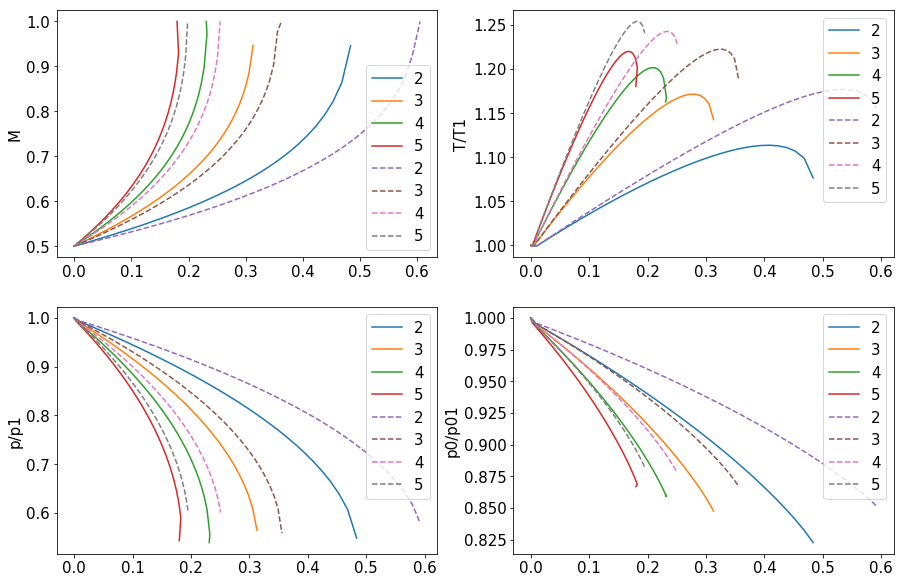

In [13]:
#import pint
import numpy as np
import matplotlib.pyplot as plt
#u = pint.UnitRegistry()
#from scipy.integrate import solve_ivp
#cp = 1000 #* u.joule / u.kilogram / u.kelvin
k = 1.4
f = 0.005 #friction factor
D = 1 #* u.meter
M0 = 0.5
#T0 = 350 #* u.kelvin
ReynoldAnalogy = True
T02_T01 = 1.005
x0 = 0 #* u.meter
Tw0_T01 = 4
n=10000000
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams.update({'font.size': 15})

def F_T0(M):
    FT0 = M**2*(1+k*M**2)*(1+(k-1)/2*M**2)/(1-M**2)
    return FT0

def F_f(M):
    Ff = k*M**4*(1+(k-1)/2*M**2)/(1-M**2)
    return Ff

def T2_T1(M2):
    _T2_T1=(T02_T01**(y-1))*(1+((k-1)/2)*M0**2)/(1+((k-1)/2)*M2**2)
    return _T2_T1

def p2_p1(M2):
    _p2_p1 = M0/M2*np.sqrt((T02_T01**(y-1))*(1+((k-1)/2)*M0**2)/(1+((k-1)/2)*M2**2))
    return _p2_p1

def p02_p01(M2):
    _p02_p01=M0/M2*np.sqrt((T02_T01**(y-1))*(1+((k-1)/2)*M0**2)/(1+((k-1)/2)*M2**2))*((1+((k-1)/2)*M2**2)/(1+((k-1)/2)*M0**2))**(k/(k-1))
    return _p02_p01


#Constant Wall temperature    
def dM2_c(M,y):
    _x_1 = x0
    _M_1 = M
    if ReynoldAnalogy:
        _x2 = D / (2 * f) * np.log(((Tw0_T01/T02_T01**(y-1))-1)/((Tw0_T01/T02_T01**(y-1))-T02_T01)) + _x_1 #Constant temperature relation
        _M_2 = _M_1 + 0.001
        converged = False
        while not converged:
            Mbar = (_M_1+_M_2) / 2
            Fbar_T0 = F_T0(Mbar)
            Fbar_f = F_f(Mbar)
            M2 = np.sqrt(_M_1 ** 2 + 2*(T02_T01-1.0)*(Fbar_T0/(T02_T01+1)+2*Fbar_f/(2*(Tw0_T01/T02_T01**(y-1))-T02_T01-1))) # constant temperature
            if Mbar>=1.0:
                Mm=M2
                M2=1
                xm=_x2
                _x2= (1-_M_1)/(Mm-_M_1)*(xm-_x_1)+_x_1
                break
            print('_M_1=',_M_1,'_M_2=',_M_2,'Mbar=',Mbar,'M2=', M2)
            #print(M, _x2, Mbar, M2, Fbar_f, Fbar_T0)
            #print(M2,_x2, _M_1 ** 2 + 2*(T02_T01-1.0)*(Fbar_T0/(T02_T01+1)+2*Fbar_f/(2*Tw0_T01-T02_T01-1)),Fbar_T0,Fbar_f)
            #print(M2)
            if (_M_2-M2>0.000001):
                _M_2 = M2
            elif (_M_2-M2<-0.000001):
                _M_2 = M2
            else:
                converged = True
                #print(T2_T1(M2))
    print("Mbar********",Mbar)
    return M2,_x2
    
fxD_c = np.zeros((n+1,8))
MM_c = np.zeros((n+1,8))
T2T1_c = np.zeros((n+1,8))
p2p1_c = np.zeros((n+1,8))
p02p01_c = np.zeros((n+1,8))

for z in range(2,6):
    print("Constant wall temperature, for Tw0_T01= ",z)
    x0 = 0 #* u.meter
    Tw0_T01 = z # has to be greater than T02_T01 otherwise the part inside the log calculating x2 becomes negative and log(-ve) is not defined. 
    M = M0
    fxD_c[0] = 4*f*x0/D
    MM_c[0] = M0
    T2T1_c[0] = 1.0
    p2p1_c[0] = 1.0
    p02p01_c[0] = 1.0
    for i in range(n):
        y=i+1
        M, x2 = dM2_c(M,y)
        x0 = x2
        MM_c[i+1,z] = M
        fxD_c[i+1,z] = 4*f*x0/D
        T2T1_c[i+1,z]=T2_T1(MM_c[i+1,z])
        p2p1_c[i+1,z]=p2_p1(MM_c[i+1,z])
        p02p01_c[i+1,z]=p02_p01(MM_c[i+1,z])
        print(MM_c[i+1,z],fxD_c[i+1,z],T2T1_c[i+1,z],p2p1_c[i+1,z],p02p01_c[i+1,z])
        if MM_c[i+1,z]== 1.0: 
            print(4*f*x0/D,'Value on x axis where graph for j or z=',z,' ends')
            break

        
        
    plt.subplot(2,2,1)
    plt.plot(fxD_c[0:i+2,z],MM_c[0:i+2,z],label=z) #i+1 done to show when M2 value goes beyond 1
    plt.ylabel("M")
    plt.legend()
    plt.grid()
    plt.subplot(2,2,2)
    plt.ylabel("T/T1")
    plt.plot(fxD_c[0:i+2,z],T2T1_c[0:i+2,z],label=z)
    plt.legend()
    plt.grid()
    plt.subplot(2,2,3)
    plt.ylabel("p/p1")
    plt.plot(fxD_c[0:i+2,z],p2p1_c[0:i+2,z],label=z)
    plt.legend()
    plt.grid()
    plt.subplot(2,2,4)
    plt.ylabel("p0/p01")
    plt.plot(fxD_c[0:i+2,z],p02p01_c[0:i+2,z],label=z)
    plt.legend()
    plt.grid()


print ('----------------------------------------------------------------------------------------------------------------------')

#Constant heat flux

def dM2(M,y):
    _x_1 = x0
    _M_1 = M
    if ReynoldAnalogy:
        _x2 = D / (2 * f) * (T02_T01)**(y-1)*((T02_T01-1)/(Tw0_T01-1)) +_x_1 # constant heat flux
        #_x2 = D / (2 * f) * np.log((Tw0_T01-1)/(Tw0_T01-T02_T01)) + _x_1 #Constant temperature relation
        _M_2 = _M_1 + 0.001
        converged = False
        while not converged:
            Mbar = (_M_1+_M_2) / 2
            Fbar_T0 = F_T0(Mbar)
            Fbar_f = F_f(Mbar)
           
            if Mbar>=1.0:
                #Mm=M2
                M2=1
                #xm=_x2
                #_x2= (1-_M_1)/(Mm-_M_1)*(xm-_x_1)+_x_1
                break
            M2 = np.sqrt(_M_1 ** 2 + (T02_T01-1.0)*(2*Fbar_T0/(T02_T01+1) + (Fbar_f*T02_T01**(y-1))/(Tw0_T01-1)))
                
            #M2 = np.sqrt(_M_1 ** 2 + (T02_T01-1.0)*(2*Fbar_T0/(T02_T01+1) + Fbar_f/((Tw0_T01-1)/(T02_T01**y-1)))) # constant Heat Flux
            #M2 = np.sqrt(_M_1 ** 2 + 2*(T02_T01-1.0)*(Fbar_T0/(T02_T01+1)+2*Fbar_f/(2*Tw0_T01-T02_T01-1))) # constant temperature
            print('_M_1=',_M_1,'_M_2=',_M_2,'Mbar=',Mbar,'M2=', M2)
            
            if (_M_2-M2>0.000001):
                _M_2 = M2
            elif (_M_2-M2<-0.000001):
                _M_2 = M2
            else:
                converged = True
                #print(T2_T1(M2))
    print("Mbar//////////",Mbar)     
    return M2,_x2

fxD = np.zeros((n+1,8))
MM = np.zeros((n+1,8))
T2T1 = np.zeros((n+1,8))
p2p1 = np.zeros((n+1,8))
p02p01 = np.zeros((n+1,8))


for j in range(2,6):
    print("----------------------------------------------")
    x0 = 0 #* u.meter
    Tw0_T01 = j
    M = M0
    fxD[0] = 4*f*x0/D
    MM[0] = M0
    T2T1[0] = 1.0
    p2p1[0] = 1.0
    p02p01[0] = 1.0
    for i in range(n):
        y= i+1
        M, x2 = dM2(M,y)
        x0 = x2
        MM[i+1,j] = M
        T2T1[i+1,j]=T2_T1(MM[i+1,j])
        p2p1[i+1,j]=p2_p1(MM[i+1,j])
        p02p01[i+1,j]=p02_p01(MM[i+1,j])
        fxD[i+1,j] = 4*f*x0/D
        print(MM[i+1,j],fxD[i+1,j],T2T1[i+1,j],p2p1[i+1,j],p02p01[i+1,j])
        if MM[i+1,j]== 1.0: #MM[i+1,j]:
            print(4*f*x0/D,'Value on x axis where graph for j=',j,' ends')
            break

        
    plt.subplot(2,2,1)
    plt.plot(fxD[0:i+2,j],MM[0:i+2,j],'--',label=j)
    plt.ylabel("M")
    plt.legend()
    plt.grid()
    plt.subplot(2,2,2)
    plt.ylabel("T/T1")
    plt.plot(fxD[0:i+1,j],T2T1[0:i+1,j],'--',label=j)
    plt.legend()
    plt.grid()
    plt.subplot(2,2,3)
    plt.ylabel("p/p1")
    plt.plot(fxD[0:i+1,j],p2p1[0:i+1,j],'--',label=j)
    plt.legend()
    plt.grid()
    plt.subplot(2,2,4)
    plt.ylabel("p0/p01")
    plt.plot(fxD[0:i+1,j],p02p01[0:i+1,j],'--',label=j)
    plt.legend()
    plt.grid()
    
plt.show()
    






In [49]:
qz=np.zeros(11)
qz[1]=5
print (qz)

[0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [78]:
x=1
y=5
while (y>=x) is True:
    print (y-x)
    y=y-x
    if (y==3):
        print('cant do further')
        break
    print("No break out of for loop")
print ("check")

4
No break out of for loop
3
cant do further
check
